In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()
# We set the default style of the graphs to the seaborn style. 

In [2]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 80)

In [3]:
# Reading the df
loan_df = pd.read_csv('../raw_data/loan_data_2007_2014.csv')

/tmp/ipykernel_7569/2387733730.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('../raw_data/loan_data_2007_2014.csv')


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Duplicates and Correlation

In [5]:
# N of rows

print(
    len(loan_df)
    , loan_df.duplicated().sum()
)

# No duplicated columns

466285 0


## Dataset Exploration

In [6]:
# We already know how we want our target variable to be. Creating the target variable
loan_df['loan_status'].value_counts(dropna = False)

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [7]:
# Encoding the target variable
loan_df['good_bad'] = np.where(loan_df['loan_status'].isin(['Charged Off', 'Default',
                                                       'Does not meet the credit policy. Status:Charged Off',
                                                       'Late (31-120 days)']), 0, 1)

# We create a new variable that has the value of '0' if a condition is met, and the value of '1' if it is not met.

loan_df['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

In [8]:
round((loan_df['good_bad'] == 0).sum()/len(loan_df), 3)

0.109

In [9]:
# Counting the number of NaN for each column
#loan_df.isnull().sum().sort_values(ascending=False) 
for col in loan_df.columns:
    print(f"{round(float(loan_df[col].isnull().sum()/len(loan_df[col]))*100)}% Missing Values on Column {col}")

0% Missing Values on Column Unnamed: 0
0% Missing Values on Column id
0% Missing Values on Column member_id
0% Missing Values on Column loan_amnt
0% Missing Values on Column funded_amnt
0% Missing Values on Column funded_amnt_inv
0% Missing Values on Column term
0% Missing Values on Column int_rate
0% Missing Values on Column installment
0% Missing Values on Column grade
0% Missing Values on Column sub_grade
6% Missing Values on Column emp_title
5% Missing Values on Column emp_length
0% Missing Values on Column home_ownership
0% Missing Values on Column annual_inc
0% Missing Values on Column verification_status
0% Missing Values on Column issue_d
0% Missing Values on Column loan_status
0% Missing Values on Column pymnt_plan
0% Missing Values on Column url
73% Missing Values on Column desc
0% Missing Values on Column purpose
0% Missing Values on Column title
0% Missing Values on Column zip_code
0% Missing Values on Column addr_state
0% Missing Values on Column dti
0% Missing Values on C

In [10]:
# emp_title
# loan_df['emp_title'].unique()
print(
    loan_df['emp_title'].value_counts(dropna=False)
    , loan_df[loan_df['emp_title'].isna()].groupby('emp_length').size().reset_index(name='N')
)
# Tem muito emp_title NA que tem resposta no emp_length. Também não tem como encodar as classes de forma satisfatória. Então vamos usar o emp_length. DROP

NaN                                  27588
Teacher                               5399
Manager                               4438
Registered Nurse                      2316
RN                                    2204
                                     ...  
SEA Group, llc                           1
The Eastern Arizona AHEC                 1
Delaware Quarries.com                    1
McCauley trucking and warehousing        1
Server Engineer Lead                     1
Name: emp_title, Length: 205476, dtype: int64    emp_length     N
0      1 year   230
1   10+ years  2682
2     2 years   403
3     3 years   555
4     4 years   452
5     5 years   521
6     6 years   376
7     7 years   407
8     8 years   313
9     9 years   210
10   < 1 year   617


In [11]:
# emp_length
loan_df['emp_length'].value_counts(dropna = False)
# O que são os NAs? Desempregado?
# Encode -> emprego estável

# vendo a frequência de valores de annual_inc para os casos em que emp_length é NA:
# loan_df[loan_df['emp_length'].isna()].groupby('annual_inc').size().reset_index(name='N')

# Média de renda anual dos casos em que emp_length é NA
print(
    f'''
    Renda média dos casos com emp_length NA = {round(np.mean(loan_df[loan_df['emp_length'].isna()]['annual_inc']), 2)}
    Renda média das categorias de emp_length 
    {loan_df.groupby('emp_length')['annual_inc'].mean()}
    '''
)

# O NA tem uma renda anual bem menor que os outros (49k vs 68k) --> encode como indefinido/unemployed
# OU -> fazer categorias menos amplas




    Renda média dos casos com emp_length NA = 49428.98
    Renda média das categorias de emp_length 
    emp_length
1 year       69023.265835
10+ years    80190.099830
2 years      70951.243257
3 years      71749.489683
4 years      71573.293625
5 years      72330.766718
6 years      71982.835566
7 years      73108.203561
8 years      74064.827391
9 years      74385.958024
< 1 year     68301.848520
Name: annual_inc, dtype: float64
    


In [12]:
# Vendo a % de good e bad por categoria de emp_length
loan_df.groupby('emp_length', dropna = False)['good_bad'].value_counts(normalize=True)

# % muito mais alta nos NAs e no < 1 year
# -> Tiebreak with WEIGHT OF EVIDENCE

emp_length  good_bad
1 year      1           0.888124
            0           0.111876
10+ years   1           0.900353
            0           0.099647
2 years     1           0.890242
            0           0.109758
3 years     1           0.890480
            0           0.109520
4 years     1           0.890411
            0           0.109589
5 years     1           0.885033
            0           0.114967
6 years     1           0.882889
            0           0.117111
7 years     1           0.888655
            0           0.111345
8 years     1           0.889931
            0           0.110069
9 years     1           0.887914
            0           0.112086
< 1 year    1           0.881015
            0           0.118985
NaN         1           0.867384
            0           0.132616
Name: good_bad, dtype: float64

In [13]:
loan_df['desc'].unique()
# Coluna muito caótica. Dropar

array(['  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       '  Borrower added on 12/09/13 > consolidate all credit accounts<br>',
       '  Borrower added on 12/06/13 > I am going to consolidate a credit card debt from medical and moving expenses with a loan I already have. I have paid everything on time for years, I just need to eliminate this

In [14]:
loan_df['mths_since_last_delinq'].unique()
# O que significa o NA nessa coluna? Não tem descrição. Dropar.
# mths_since_last_record idem

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0., 110.,  84., 135.,
        88.,  87., 122.,  91., 146., 134., 114.,  99.,  93., 127., 101.,
        94., 102., 129., 113., 139., 131., 156., 143., 109., 119., 149.,
       118., 130., 148., 126.,  90., 141., 116., 100., 152.,  98.,  92.,
       108., 133., 104., 111., 105., 170., 124., 136., 180., 188., 140.,
       151., 159., 121.])

In [15]:
loan_df['next_pymnt_d'].unique() # Sem interpretação do que são os NAs -> DROP

array([nan, 'Feb-16', 'Jan-16', 'Sep-13', 'Feb-14', 'May-14', 'Jun-13',
       'Mar-12', 'Apr-12', 'May-13', 'Aug-12', 'Aug-13', 'Jun-12',
       'Nov-13', 'Feb-12', 'Oct-11', 'Jan-13', 'Jan-14', 'Jul-13',
       'Jul-15', 'Jan-12', 'Dec-12', 'Jun-11', 'Feb-13', 'Nov-11',
       'Nov-12', 'Dec-11', 'Aug-11', 'Sep-11', 'Apr-11', 'Mar-14',
       'Apr-13', 'Mar-11', 'Jul-12', 'Aug-14', 'Oct-13', 'Sep-12',
       'May-12', 'Apr-15', 'Jul-11', 'Dec-15', 'Dec-13', 'Jan-11',
       'Oct-12', 'Nov-14', 'Mar-13', 'Aug-15', 'Feb-15', 'May-15',
       'Jul-14', 'Nov-15', 'Sep-14', 'Oct-15', 'May-11', 'Feb-11',
       'Dec-14', 'Jun-15', 'Apr-14', 'Jan-15', 'Sep-15', 'Jun-14',
       'Nov-10', 'Oct-10', 'Dec-10', 'Mar-15', 'Oct-14', 'Jul-10',
       'Sep-10', 'May-10', 'Aug-10', 'Mar-10', 'Jun-10', 'Apr-10',
       'Feb-10', 'Dec-09', 'Nov-09', 'Oct-09', 'Jan-10', 'Sep-09',
       'Jun-09', 'Aug-09', 'Jul-09', 'May-09', 'Apr-09', 'Jan-09',
       'Oct-08', 'Feb-09', 'Nov-08', 'Sep-08', 'Mar-09', 

In [16]:
# Total collection amounts ever owed -> Tem 0 e tem NA. Valor padrão na coluna é zero (346.259). Imputar com zero.
loan_df['tot_coll_amt'].unique()
loan_df['tot_coll_amt'].value_counts(dropna = False)
loan_df['tot_coll_amt'].median()
# loan_df[['tot_coll_amt']].boxplot()

# loan_df.groupby('good_bad')['tot_coll_amt'].mean()

# Muitos outliers -> Robust scaler e impute median

0.0

In [17]:
# Total current balance of all accounts. 15% de NA. Variável boa, pq é uma medida do poder de pagamento.
loan_df['tot_cur_bal'].value_counts()

# IMPUTAR com média ou mediana?
print(f"Mean = {loan_df['tot_cur_bal'].mean()}\nMedian = {loan_df['tot_cur_bal'].median()}")

# Mediana talvez seja melhor

Mean = 138801.71338530185
Median = 81539.0


<AxesSubplot:>

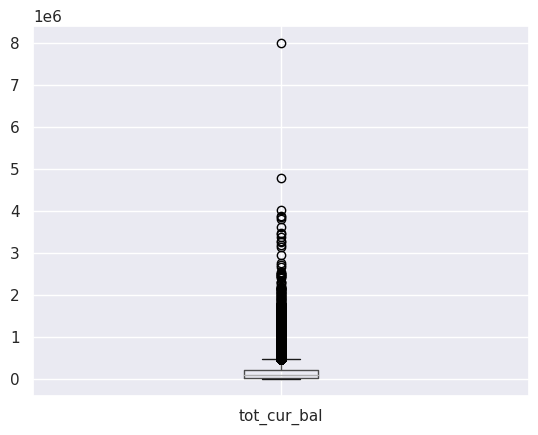

In [18]:
loan_df[['tot_cur_bal']].boxplot()
# Muito outlier -> Robust!

In [19]:
# Total revolving high credit/ credit limit
loan_df['total_rev_hi_lim'].value_counts()

# IMPUTAR com média ou mediana?
print(f"Mean = {loan_df['total_rev_hi_lim'].mean()}\nMedian = {loan_df['total_rev_hi_lim'].median()}")

Mean = 30379.087770732483
Median = 22800.0


In [20]:
loan_df[['total_rev_hi_lim']].boxplot()
# muito outlier. Min/Max

<AxesSubplot:>

In [21]:
loan_df[['tot_cur_bal', 'total_rev_hi_lim']].isnull().sum()

tot_cur_bal         70276
total_rev_hi_lim    70276
dtype: int64

In [22]:
# Dropping features with very high percentage of missing values or that we cannot meaningfully encode
loan_df.drop(columns = ['Unnamed: 0', 'desc', 'mths_since_last_delinq', 'mths_since_last_record', 'annual_inc_joint', 'annual_inc_joint', 'dti_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'next_pymnt_d', 'mths_since_last_major_derog', 'verification_status_joint', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'policy_code']
             , inplace = True)


In [23]:
for col in loan_df.columns:
    print(f"{round(float(loan_df[col].isnull().sum()/len(loan_df[col]))*100)}% Missing Values on Column {col}")
    
# tot_col_amnt ainda não sabemos o q fazer com essa variável

0% Missing Values on Column id
0% Missing Values on Column member_id
0% Missing Values on Column loan_amnt
0% Missing Values on Column funded_amnt
0% Missing Values on Column funded_amnt_inv
0% Missing Values on Column term
0% Missing Values on Column int_rate
0% Missing Values on Column installment
0% Missing Values on Column grade
0% Missing Values on Column sub_grade
6% Missing Values on Column emp_title
5% Missing Values on Column emp_length
0% Missing Values on Column home_ownership
0% Missing Values on Column annual_inc
0% Missing Values on Column verification_status
0% Missing Values on Column issue_d
0% Missing Values on Column loan_status
0% Missing Values on Column pymnt_plan
0% Missing Values on Column url
0% Missing Values on Column purpose
0% Missing Values on Column title
0% Missing Values on Column zip_code
0% Missing Values on Column addr_state
0% Missing Values on Column dti
0% Missing Values on Column delinq_2yrs
0% Missing Values on Column earliest_cr_line
0% Missing

## Weight of Evidence

Preparation

*To find a weight of evidence of grade, we must first find the proportion of good and bad
borrowers by grade.*

## Correlation

In [24]:
# Heatmap of pairwise correlations
correlation_matrix = loan_df.corr()
correlation_matrix

column_names = correlation_matrix.columns
sns.heatmap(correlation_matrix, cmap= "twilight_shifted");

In [25]:
correlation_matrix

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_bad
id,1.000000,0.997299,0.067542,0.071149,0.080057,-0.030501,0.039863,0.024231,0.130291,0.072024,-0.085182,0.099886,0.105560,0.028976,-0.011012,0.074346,0.445555,0.445651,-0.284595,-0.275468,-0.278272,-0.144487,-0.042162,-0.066162,-0.030594,-0.078282,0.056528,0.026759,0.004007,0.007574,0.023957,0.095883
member_id,0.997299,1.000000,0.070210,0.073942,0.083196,-0.028278,0.042639,0.024921,0.129867,0.072536,-0.086382,0.099950,0.107664,0.028793,-0.010093,0.074462,0.447998,0.448092,-0.282848,-0.273351,-0.277070,-0.142031,-0.043115,-0.066358,-0.030748,-0.076851,0.056772,0.026981,0.004088,0.007827,0.023818,0.096759
loan_amnt,0.067542,0.070210,1.000000,0.998548,0.994347,0.167183,0.949666,0.370893,0.057319,0.006841,-0.020328,0.204182,-0.081137,0.331423,0.117756,0.235262,0.518700,0.518660,0.743841,0.743580,0.612777,0.715876,0.043650,0.110691,0.077336,0.304243,-0.008067,0.006283,-0.002859,0.332686,0.290208,-0.011819
funded_amnt,0.071149,0.073942,0.998548,1.000000,0.996125,0.167921,0.951787,0.370311,0.058673,0.007386,-0.020970,0.204983,-0.080593,0.331039,0.118885,0.235135,0.521451,0.521412,0.743363,0.743441,0.612318,0.715664,0.043350,0.110338,0.077190,0.304178,-0.007822,0.006472,-0.002859,0.332683,0.290206,-0.011003
funded_amnt_inv,0.080057,0.083196,0.994347,0.996125,1.000000,0.169353,0.947387,0.367806,0.062606,0.008143,-0.027580,0.205807,-0.078894,0.327436,0.120774,0.235456,0.525143,0.525115,0.738037,0.745460,0.607027,0.713460,0.038985,0.107944,0.073781,0.303105,-0.007175,0.006801,-0.002858,0.332677,0.290185,-0.007191
int_rate,-0.030501,-0.028278,0.167183,0.167921,0.169353,1.000000,0.148790,-0.046072,0.159657,0.079190,0.205641,0.012307,0.066695,-0.004589,0.323365,-0.033012,0.137427,0.137451,0.127035,0.129166,-0.032130,0.485154,0.057875,0.127893,0.082198,0.075609,0.020306,0.030338,0.000863,-0.097316,-0.146838,-0.172361
installment,0.039863,0.042639,0.949666,0.951787,0.947387,0.148790,1.000000,0.368145,0.049919,0.017001,0.002247,0.196839,-0.070093,0.320239,0.136852,0.215906,0.408838,0.408811,0.764360,0.763895,0.663399,0.641948,0.052341,0.105666,0.075344,0.299867,-0.006055,0.008923,-0.002359,0.300639,0.270074,-0.013936
annual_inc,0.024231,0.024921,0.370893,0.370311,0.367806,-0.046072,0.368145,1.000000,-0.188548,0.058896,0.056675,0.157784,-0.015439,0.332316,0.037582,0.224690,0.168316,0.168316,0.299784,0.298728,0.275823,0.212951,0.020273,0.016954,0.013680,0.142155,-0.000445,0.017133,0.001895,0.486086,0.291955,0.049864
dti,0.130291,0.129867,0.057319,0.058673,0.062606,0.159657,0.049919,-0.188548,1.000000,-0.003694,-0.012541,0.303914,-0.046192,0.143380,0.200412,0.228221,0.119984,0.119972,-0.026007,-0.021788,-0.063895,0.089582,-0.005747,0.021462,0.018084,-0.043068,0.000308,0.009491,-0.003560,-0.018384,0.060972,-0.048102
delinq_2yrs,0.072024,0.072536,0.006841,0.007386,0.008143,0.079190,0.017001,0.058896,-0.003694,1.000000,0.017985,0.059134,-0.010810,-0.031121,-0.013183,0.130793,0.043857,0.043852,-0.019697,-0.018993,-0.032098,0.024274,0.024428,0.004484,0.005382,-0.013740,0.039147,0.126532,0.000072,0.072699,-0.035028,-0.001227


In [26]:
# Converting the correlation matrix into a DataFrame
corr_df = correlation_matrix.stack().reset_index()

# Renaming the columns
corr_df.columns = ['feature_1','feature_2', 'correlation']

# Remove "self correlations"
no_self_correlation = (corr_df['feature_1'] != corr_df['feature_2'])
corr_df = corr_df[no_self_correlation]
corr_df

,feature_1,feature_2,correlation
1,id,member_id,0.997299
2,id,loan_amnt,0.067542
3,id,funded_amnt,0.071149
4,id,funded_amnt_inv,0.080057
5,id,int_rate,-0.030501
...,...,...,...
1018,good_bad,collections_12_mths_ex_med,0.005114
1019,good_bad,acc_now_delinq,0.000197
1020,good_bad,tot_coll_amt,0.001209
1021,good_bad,tot_cur_bal,0.051197


## Outliers

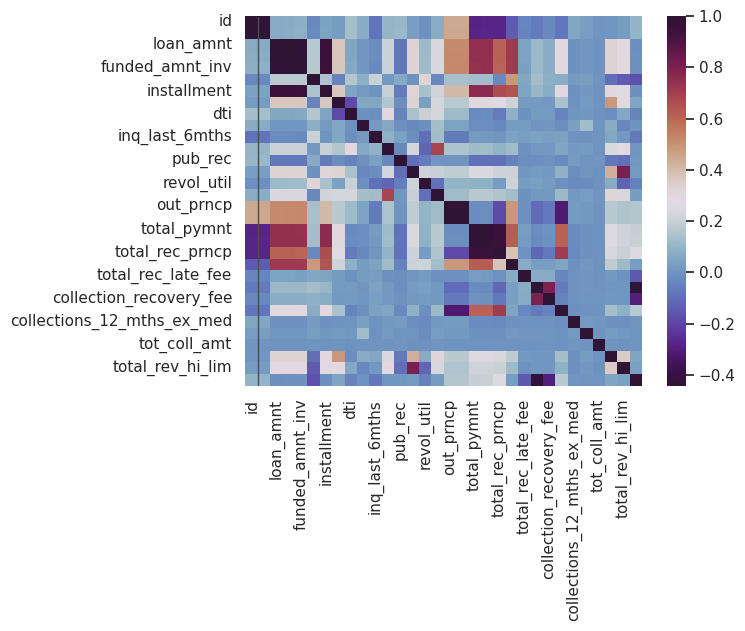

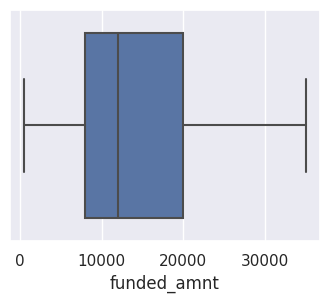

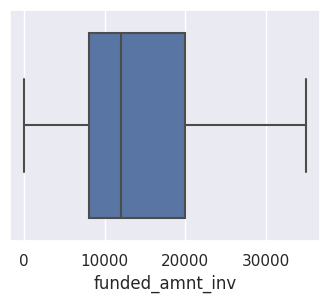

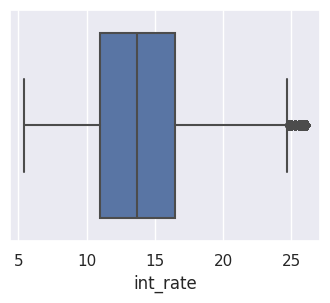

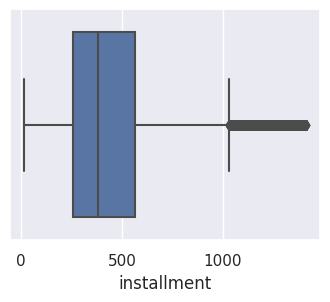

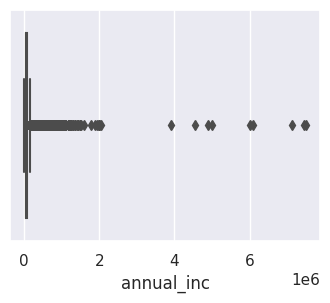

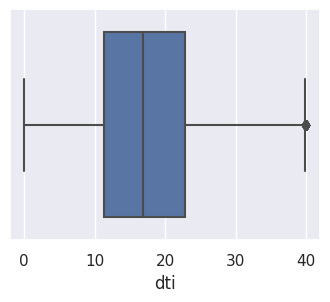

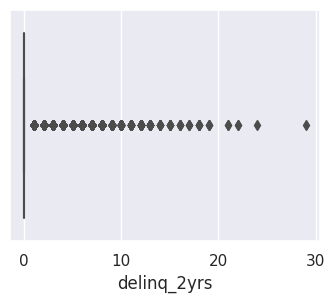

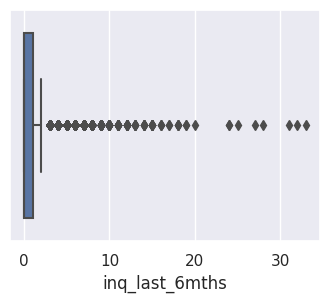

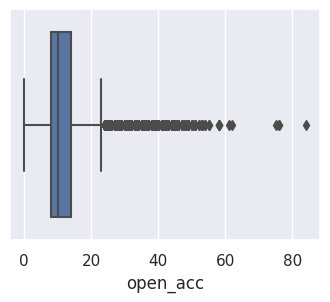

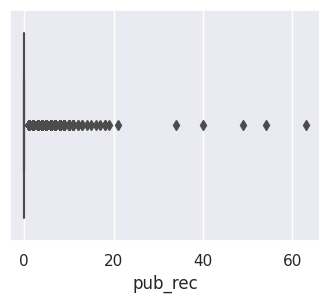

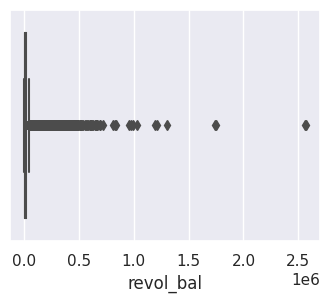

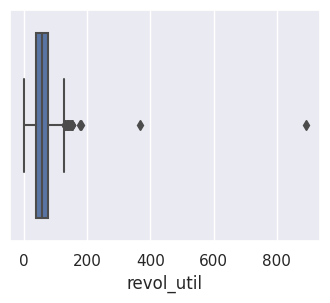

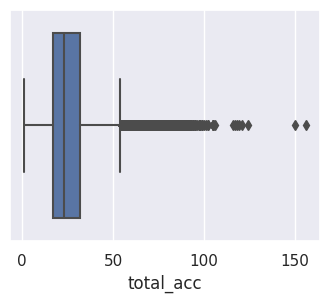

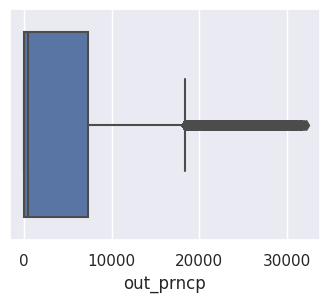

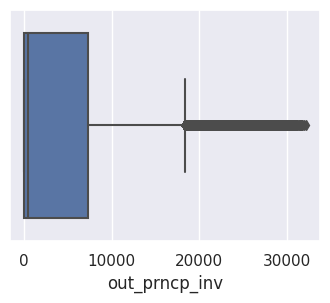

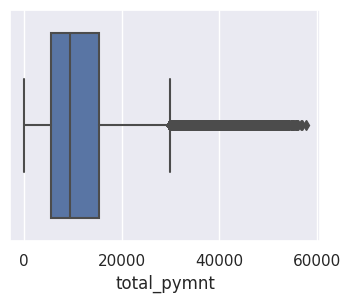

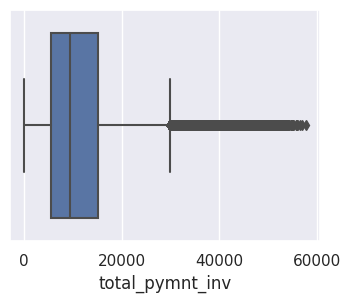

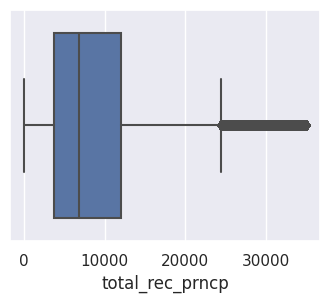

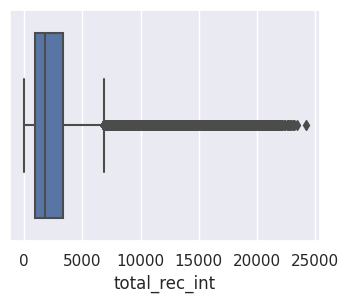

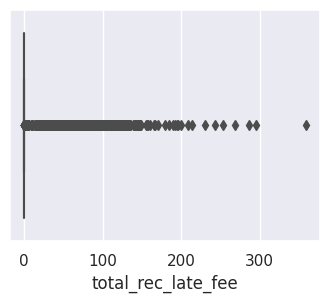

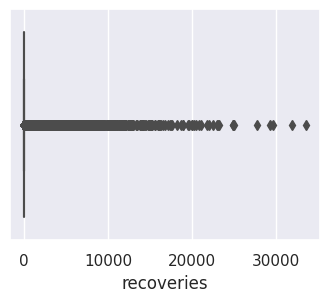

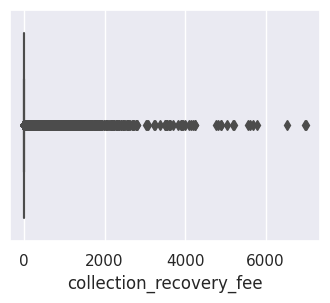

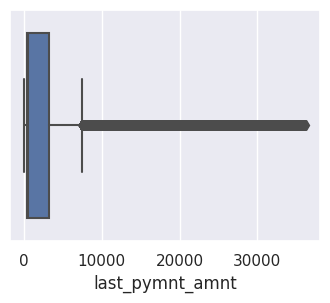

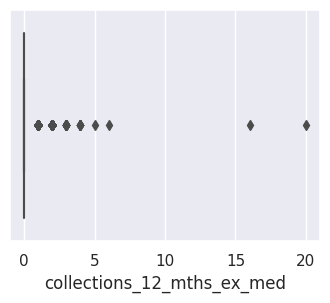

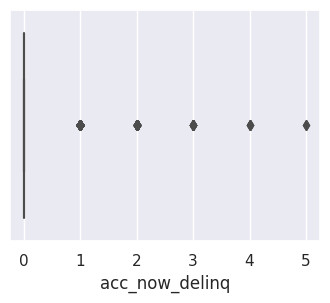

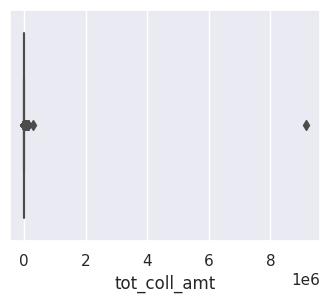

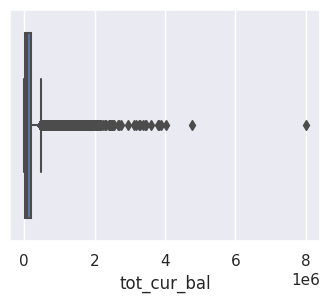

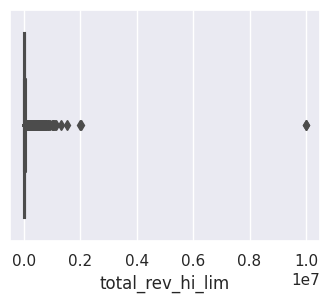

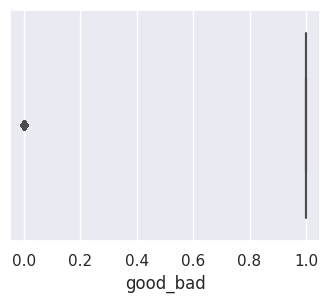

In [27]:
from pandas.api.types import is_numeric_dtype

for col in loan_df.iloc[:,3:]:
    if is_numeric_dtype(loan_df[col]):
        plt.figure(figsize=(4, 3))
        sns.boxplot(data = loan_df, x = col)
        plt.show();
        # Consigo colocar um do lado do outro?
        
# The upper and lower limits are the IQR -> past them, everything is an outlier
# Cols:
# 'total_rev_hi_lim', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs'(tem mt zero... oq fazer?)
# , 'inq_last_6mths', 'open_acc', 'pub_rec'
# , 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp'
# , 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med'
# , 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'

# Fazer Robust Scaler nessas variáveis acima (outliers)
# RobustScaler = (x - median)/IQR


# Colunas esquisitas: 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'pub_rec' --> considerar OHE nessas

In [28]:
# Tests
loan_df['acc_now_delinq'].unique()

array([ 0.,  1., nan,  2.,  3.,  5.,  4.])

In [29]:
# sns.boxplot(data = loan_df, x = 'acc_now_delinq')
# plt.show()

loan_df['acc_now_delinq'].value_counts()

0.0    464524
1.0      1623
2.0        92
3.0        11
4.0         4
5.0         2
Name: acc_now_delinq, dtype: int64

## Categorical Features

In [30]:
#### Balancear o dataset?
# Balancing strategies
# Oversampling of minority class
# Alternatively, Computation of new instances for the minority class
# Undersampling of majority class

# Use balancing techniques only on the training set to help the model learn about the minority class.
# The test set should remain representative of the real word.

### SMOTE?

### Encodings
# Ordinal Encoder -> se tiver lógica crescente entre as categorias
# One Hot Encoder -> se NÃO tiver lógica crescente entre as categorias


In [31]:
loan_df.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [32]:
# Verificando variáveis

loan_df['verification_status'].unique()
loan_df.groupby('verification_status')['good_bad'].value_counts(normalize = True)

loan_df['pymnt_plan'].value_counts() # Muito fraca

# Purpose -> Boa, clusterizar
loan_df['purpose'].value_counts()
loan_df.groupby('purpose')['good_bad'].value_counts()
# loan_df.groupby('purpose')['good_bad'].value_counts(normalize = True)

# Title -> caótico. Drop
loan_df['title'].value_counts()

# earliest_cr_line -> data. Drop.
loan_df['earliest_cr_line'].value_counts()

# initial_list_status: w = whole; f = fractional 
loan_df['initial_list_status'].value_counts() # Incerto.

loan_df['application_type'].value_counts()

INDIVIDUAL    466285
Name: application_type, dtype: int64

In [33]:
# Drop!
loan_df.drop(columns = ['id', 'member_id', 'sub_grade', 'emp_title', 'verification_status', 'loan_status', 'issue_d', 'pymnt_plan', 'url', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d', 'application_type'], inplace = True)

In [34]:
loan_df.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'purpose',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'good_bad']

In [35]:
# Clusterizar emp_length
# Juntar NA + < 1yr
# 1 a 3 yrs...

# temporary X and y just to get the weight of evidence
Xtemp = loan_df.drop(columns='good_bad')
ytemp = loan_df['good_bad']

# function to get WoE in discrete
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

# function to get WoE and IV
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

# function to plot df_woe
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.
    plt.show()


In [36]:
# # transforming it into float64
# loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'])
# type(loan_df['emp_length'][0])
#df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((loan_df['emp_length'].isnull()), 1, 0)


loan_df['emp_length'].isnull().sum()

21008

In [37]:
df_temp = woe_ordered_continuous(Xtemp, 'emp_length', ytemp)
df_temp 

,emp_length,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1 year,29622,0.888124,0.066525,26308.0,3314.0,0.066251,0.068781,-0.037473,NaN,NaN,0.004826
1,10+ years,150049,0.900353,0.336979,135097.0,14952.0,0.340213,0.310323,0.091958,0.012229,0.129431,0.004826
2,2 years,41373,0.890242,0.092915,36832.0,4541.0,0.092754,0.094247,-0.015970,0.010110,0.107928,0.004826
3,3 years,36596,0.890480,0.082187,32588.0,4008.0,0.082066,0.083185,-0.013538,0.000237,0.002432,0.004826
4,4 years,28023,0.890411,0.062934,24952.0,3071.0,0.062836,0.063737,-0.014239,0.000068,0.000701,0.004826
5,5 years,30774,0.885033,0.069112,27236.0,3538.0,0.068588,0.073430,-0.068212,0.005379,0.053973,0.004826
6,6 years,26112,0.882889,0.058642,23054.0,3058.0,0.058057,0.063468,-0.089112,0.002144,0.020900,0.004826
7,7 years,26180,0.888655,0.058795,23265.0,2915.0,0.058588,0.060500,-0.032110,0.005766,0.057002,0.004826
8,8 years,22395,0.889931,0.050295,19930.0,2465.0,0.050190,0.051160,-0.019156,0.001275,0.012954,0.004826
9,9 years,17888,0.887914,0.040173,15883.0,2005.0,0.039998,0.041613,-0.039585,0.002017,0.020429,0.004826


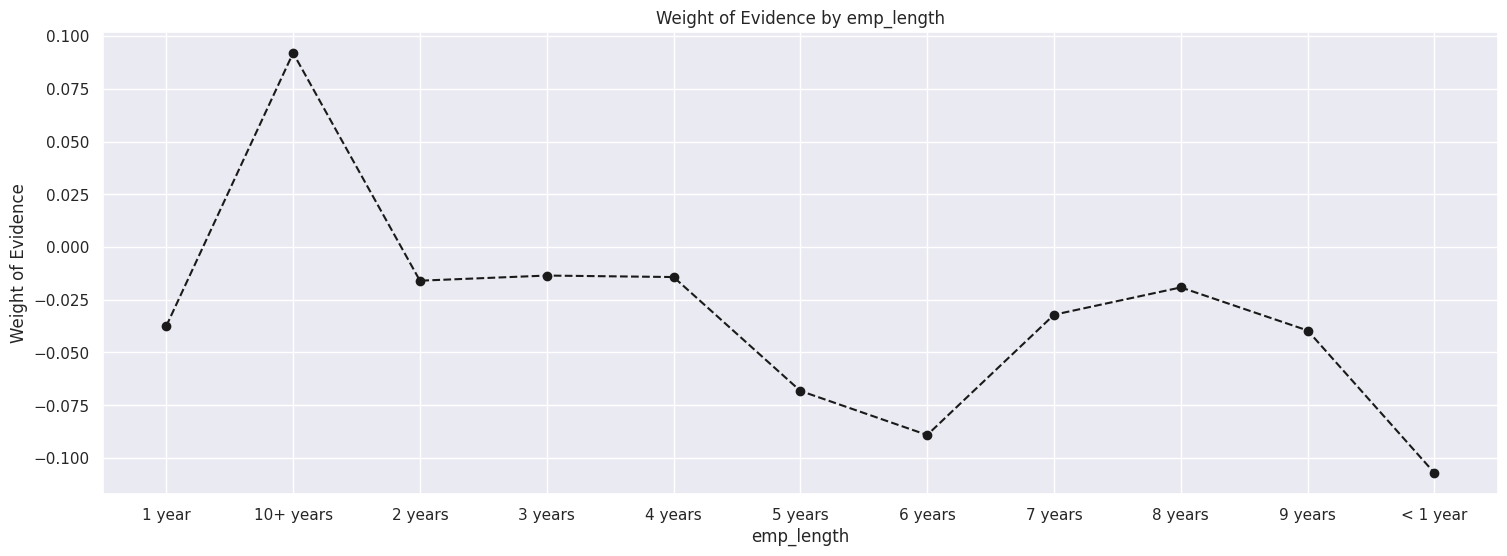

In [38]:
plot_by_woe(df_temp)

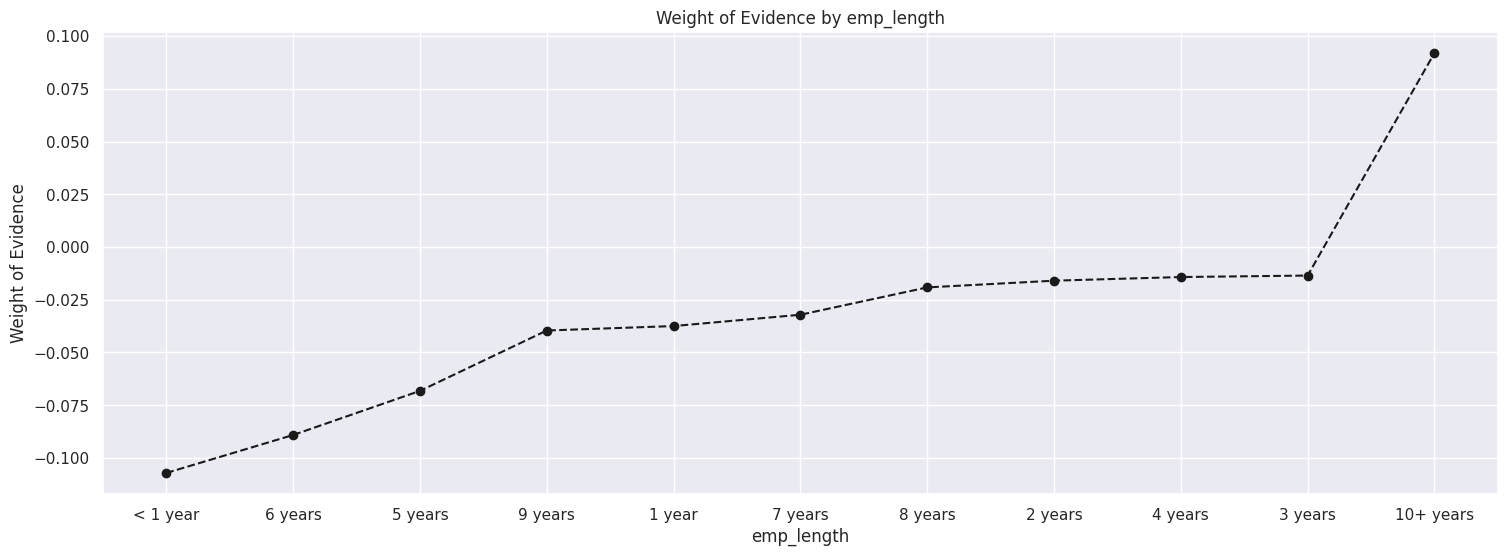

In [39]:
df_temp = woe_discrete(Xtemp, 'emp_length', ytemp)
plot_by_woe(df_temp)

In [40]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [41]:
# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'

# ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years', '5 years' '6 years' '2 years' '7 years' nan]

# nan
loan_df['emp_length'] = loan_df['emp_length'].fillna('Unemployed')

# 0
loan_df['emp_length'] = loan_df['emp_length'].replace('< 1 year', 'Less than 1 year')

# 1
loan_df['emp_length'] = loan_df['emp_length'].replace('1 year', '1 year')

# 2 - 4
loan_df['emp_length'] = loan_df['emp_length'].replace('2 years', '2 to 4 years')
loan_df['emp_length'] = loan_df['emp_length'].replace('3 years', '2 to 4 years')
loan_df['emp_length'] = loan_df['emp_length'].replace('4 years', '2 to 4 years')

# 5 - 6
loan_df['emp_length'] = loan_df['emp_length'].replace('5 years', '5 to 6 years')
loan_df['emp_length'] = loan_df['emp_length'].replace('6 years', '5 to 6 years')

# 7 - 9
loan_df['emp_length'] = loan_df['emp_length'].replace('7 years', '7 to 9 years')
loan_df['emp_length'] = loan_df['emp_length'].replace('8 years', '7 to 9 years')
loan_df['emp_length'] = loan_df['emp_length'].replace('9 years', '7 to 9 years')

# 10
loan_df['emp_length'] = loan_df['emp_length'].replace('10+ years', '10 years or more')

loan_df['emp_length'].unique()

array(['10 years or more', 'Less than 1 year', '1 year', '2 to 4 years',
       '7 to 9 years', '5 to 6 years', 'Unemployed'], dtype=object)

In [42]:
loan_df['emp_length'].unique()

array(['10 years or more', 'Less than 1 year', '1 year', '2 to 4 years',
       '7 to 9 years', '5 to 6 years', 'Unemployed'], dtype=object)

In [43]:
# Clusterizar 'purpose'
loan_df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [44]:
df_temp = woe_discrete(Xtemp, 'purpose', ytemp)
df_temp 

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,7013,0.784258,0.015040,5500.0,1513.0,0.013243,0.029685,-0.807190,NaN,NaN,0.03698
1,educational,422,0.791469,0.000905,334.0,88.0,0.000804,0.001727,-0.764040,0.007211,0.043151,0.03698
2,renewable_energy,351,0.846154,0.000753,297.0,54.0,0.000715,0.001059,-0.393096,0.054685,0.370944,0.03698
3,moving,2994,0.847361,0.006421,2537.0,457.0,0.006109,0.008966,-0.383790,0.001208,0.009306,0.03698
4,house,2269,0.859850,0.004866,1951.0,318.0,0.004698,0.006239,-0.283798,0.012489,0.099992,0.03698
5,other,23690,0.862009,0.050806,20421.0,3269.0,0.049170,0.064138,-0.265764,0.002159,0.018034,0.03698
6,medical,4602,0.866145,0.009870,3986.0,616.0,0.009597,0.012086,-0.230548,0.004136,0.035217,0.03698
7,wedding,2343,0.878361,0.005025,2058.0,285.0,0.004955,0.005592,-0.120843,0.012216,0.109704,0.03698
8,vacation,2487,0.882187,0.005334,2194.0,293.0,0.005283,0.005749,-0.084535,0.003826,0.036308,0.03698
9,debt_consolidation,274195,0.886690,0.588042,243126.0,31069.0,0.585399,0.609579,-0.040475,0.004503,0.044060,0.03698


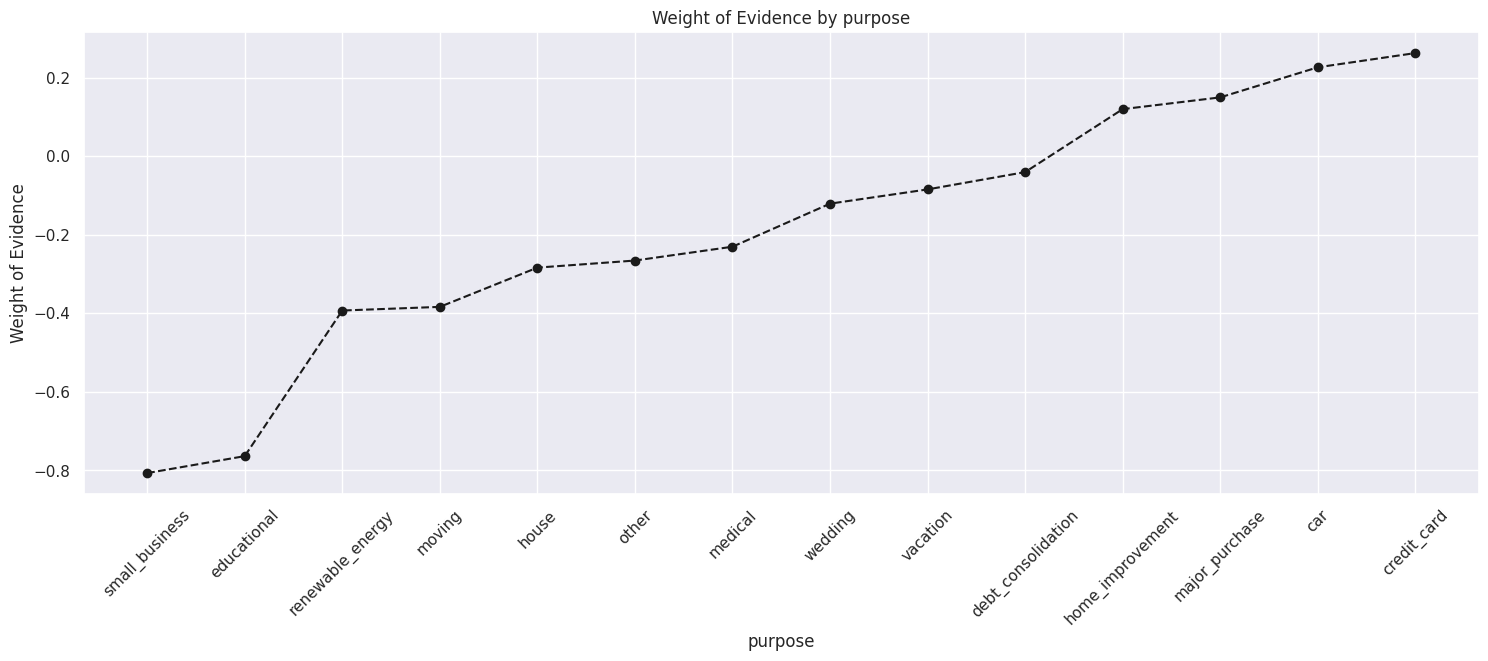

In [45]:
plot_by_woe(df_temp, 45)

In [46]:
# replacing the strings

# small business or educational
loan_df['purpose'] = loan_df['purpose'].replace('small_business', 'Small business or educational')
loan_df['purpose'] = loan_df['purpose'].replace('educational', 'Small business or educational')

# renewable energy, moving, house, other
loan_df['purpose'] = loan_df['purpose'].replace('renewable_energy', 'Renewable energy investment, moving, house or other')
loan_df['purpose'] = loan_df['purpose'].replace('moving', 'Renewable energy investment, moving, house or other')
loan_df['purpose'] = loan_df['purpose'].replace('house', 'Renewable energy investment, moving, house or other')
loan_df['purpose'] = loan_df['purpose'].replace('other', 'Renewable energy investment, moving, house or other')

# medical, wedding, vacation
loan_df['purpose'] = loan_df['purpose'].replace('medical', 'Medical, wedding or vacation')
loan_df['purpose'] = loan_df['purpose'].replace('wedding', 'Medical, wedding or vacation')
loan_df['purpose'] = loan_df['purpose'].replace('vacation', 'Medical, wedding or vacation')

# debt consolidation
loan_df['purpose'] = loan_df['purpose'].replace('debt_consolidation', 'Debt consolidation')

# home_improvement, major_purchase or car
loan_df['purpose'] = loan_df['purpose'].replace('home_improvement', 'Home improvement, car or major purchase')
loan_df['purpose'] = loan_df['purpose'].replace('major_purchase', 'Home improvement, car or major purchase')
loan_df['purpose'] = loan_df['purpose'].replace('car', 'Home improvement, car or major purchase')

# credit_card
loan_df['purpose'] = loan_df['purpose'].replace('credit_card', 'Credit card payment')

loan_df['purpose'].unique()

array(['Credit card payment', 'Home improvement, car or major purchase',
       'Small business or educational',
       'Renewable energy investment, moving, house or other',
       'Medical, wedding or vacation', 'Debt consolidation'], dtype=object)

In [47]:
# Home ownership

df_temp = woe_discrete(Xtemp, 'home_ownership', ytemp)
df_temp 

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,182,0.791209,0.000390,144.0,38.0,0.000347,0.000746,-0.765617,NaN,NaN,inf
1,NONE,50,0.840000,0.000107,42.0,8.0,0.000101,0.000157,-0.439616,0.048791,0.326001,inf
2,RENT,188473,0.873897,0.404201,164706.0,23767.0,0.396579,0.466312,-0.161980,0.033897,0.277636,inf
3,OWN,41704,0.891737,0.089439,37189.0,4515.0,0.089544,0.088585,0.010764,0.017840,0.172744,inf
4,MORTGAGE,235875,0.904017,0.505860,213235.0,22640.0,0.513427,0.444200,0.144832,0.012280,0.134069,inf
5,ANY,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.095983,inf,inf


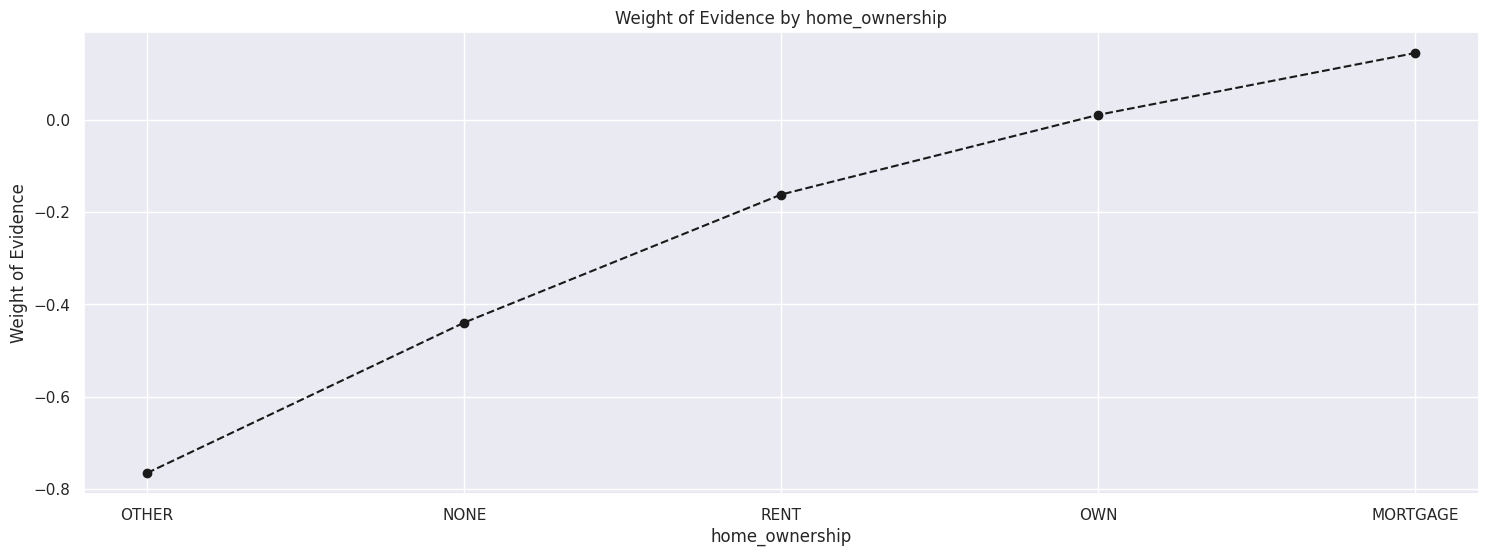

In [48]:
plot_by_woe(df_temp)

In [49]:
# Rent and mortgage are solid categories, hence there is no need to transform them. OWN is quantitativaly less representative but still corresponds to 9% of the observations and 
# has a good WoE. All the others should merge into one category

loan_df['home_ownership'] = loan_df['home_ownership'].replace('OTHER', 'Other')
loan_df['home_ownership'] = loan_df['home_ownership'].replace('NONE', 'Other')
loan_df['home_ownership'] = loan_df['home_ownership'].replace('ANY', 'Other')

loan_df['home_ownership'] = loan_df['home_ownership'].replace('OWN', 'Own')
loan_df['home_ownership'] = loan_df['home_ownership'].replace('MORTGAGE', 'Mortgage')
loan_df['home_ownership'] = loan_df['home_ownership'].replace('RENT', 'Rent')

loan_df['home_ownership'].unique()

array(['Rent', 'Own', 'Mortgage', 'Other'], dtype=object)

In [50]:
lc = ['home_ownership', 'purpose', 'emp_length']
for i in lc:
    print(f'Feature {i} tinha {len(Xtemp[i].unique())} valores: {Xtemp[i].unique()}\n\nAgora tem {len(loan_df[i].unique())}: {loan_df[i].unique()}')
    print('-'*100)


Feature home_ownership tinha 6 valores: ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

Agora tem 4: ['Rent' 'Own' 'Mortgage' 'Other']
----------------------------------------------------------------------------------------------------
Feature purpose tinha 14 valores: ['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']

Agora tem 6: ['Credit card payment' 'Home improvement, car or major purchase'
 'Small business or educational'
 'Renewable energy investment, moving, house or other'
 'Medical, wedding or vacation' 'Debt consolidation']
----------------------------------------------------------------------------------------------------
Feature emp_length tinha 12 valores: ['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

Agora tem 7: ['10 years or more' 'Less than 1 year' '1 year' '2 

In [51]:
loan_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [52]:
loan_df['term'] = loan_df['term'].replace(' 36 months', '3 years (36 months)')
loan_df['term'] = loan_df['term'].replace(' 60 months', '5 years (60 months)')

loan_df['term'].unique()

array(['3 years (36 months)', '5 years (60 months)'], dtype=object)

In [53]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'good_bad'],
      dtype='object')

In [54]:
loan_df.drop(columns = ['funded_amnt', 'funded_amnt_inv', 'installment', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt', 'total_rev_hi_lim'], inplace = True)

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   loan_amnt       466285 non-null  int64  
 1   term            466285 non-null  object 
 2   int_rate        466285 non-null  float64
 3   grade           466285 non-null  object 
 4   emp_length      466285 non-null  object 
 5   home_ownership  466285 non-null  object 
 6   annual_inc      466281 non-null  float64
 7   purpose         466285 non-null  object 
 8   tot_cur_bal     396009 non-null  float64
 9   good_bad        466285 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 35.6+ MB


In [56]:
# Writing treated dataframe
loan_df.to_csv('../raw_data/treated_df.csv', index = False)